<a href="https://colab.research.google.com/github/anas-7513/TP-1-ML/blob/master/Memoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction :**

Récupération des données financières à partir de bases de données en lignes (Yahoo Finance) sur Python.


In [0]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


# ***Importation des bibliothèques :***

In [0]:
from pandas_datareader import data as pdr

import yfinance as yf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Librairie Google Colab
from google.colab import drive

In [0]:
# Monte votre Google Drive sur le serveur.
drive.mount("/content/MyDrive/")

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


# ***Paramétrage de la simulation du portefeuille :***

In [0]:
# Définir les tickers des instruments qu'il faut récupérer. Ici, Nous utiliserons les ticker SX5E, CAC40. 
tickers = ['^STOXX50E', '^FCHI']

# Ici, nous renseignons la tranche de date que nous allons récupérer (du 01/01/2010 au 30/04/2020)
start_date = '2010-12-31' #'2010-01-01'
end_date = '2017-12-31' #'2020-04-30'

# On utilise la fonction pandas_reader.data.DataReader pour charger les données souhaitées. 
panel_data = pdr.get_data_yahoo(tickers, start_date, end_date)

In [0]:
# Cela retourne les 9 premières observations du dataset
panel_data.head(9)

Attributes    Adj Close               ...    Volume             
Symbols       ^STOXX50E        ^FCHI  ... ^STOXX50E        ^FCHI
Date                                  ...                       
2011-01-03  2839.429932  3900.860107  ...       0.0   72025000.0
2011-01-04  2844.169922  3916.030029  ...       0.0  109202000.0
2011-01-05  2833.739990  3904.610107  ...       0.0  116335600.0
2011-01-06  2836.229980  3904.419922  ...       0.0  124397200.0
2011-01-07  2808.250000  3865.580078  ...       0.0  113235600.0
2011-01-10  2760.879883  3802.030029  ...       0.0  123908000.0
2011-01-11  2796.600098  3861.919922  ...       0.0  135100800.0
2011-01-12  2879.110107  3945.070068  ...       0.0  177690200.0
2011-01-13  2915.620117  3974.830078  ...       0.0  185024800.0

[9 rows x 12 columns]

# ***Préparation des données***

Nous allons travailler sur le prix de clôture "close". On va s'assurer que tous les jours de la semaine soient inclus dans notre dataset. Il faut un dataset esxhaustif afin de réaliser une stratégie de trading quantitatives. 

Pour cela:
- pour les jours fériés, aucun prix n'est disponible. On les supprimera du dataset
- Pour les autres cas, nous comblerons les prix manquants avec les derniers prix disponibles

In [0]:
# Récupération des prix de clôture ajustés.
close = panel_data['Close']

# Récupération de tous les jours de la semaine entre la tranche de dates sélectionnée
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Nous réindexons le prix de clôture ajustés pour l'associer à sa date 
close = close.reindex(all_weekdays)

# La réindexation permettra d'insérer les valeurs manquantes (NaN) pour les dates qui ne sont pas présentes
# dans le dataset. Pour y faire face, nous comblerons les valeurs manquantes en les remplaçant
# par le dernier prix disponible pour chaque instrument.
close = close.fillna(method='ffill')

In [0]:
print(all_weekdays)

DatetimeIndex(['2010-12-31', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=1826, freq='B')


In [0]:
#Nettoyage du dataset
close.head(10)

Symbols,^STOXX50E,^FCHI
2010-12-31,NaN,NaN
2011-01-03,2839.429932,3900.860107
2011-01-04,2844.169922,3916.030029
2011-01-05,2833.739990,3904.610107
2011-01-06,2836.229980,3904.419922
2011-01-07,2808.250000,3865.580078
2011-01-10,2760.879883,3802.030029
2011-01-11,2796.600098,3861.919922
2011-01-12,2879.110107,3945.070068
2011-01-13,2915.620117,3974.830078


In [0]:
print(close.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2010-12-31 to 2017-12-29
Freq: B
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ^STOXX50E  1825 non-null   float64
 1   ^FCHI      1825 non-null   float64
dtypes: float64(2)
memory usage: 42.8 KB
None


In [0]:
print(close.isna().sum())

print('Nous allons supprimer '+ str(close.isna().sum()[0]) + ' valeur(s) nulle(s) du dataset sur les ' + str(close.shape[0]) + ' observations')

Symbols
^STOXX50E    1
^FCHI        1
dtype: int64
Nous allons supprimer 1 valeur(s) nulle(s) du dataset sur les 1826 observations


In [0]:
#suppression des lignes en valeurs nulles
close.dropna(inplace=True)

In [0]:
#dataset nettoyé des adjust close price
close.head()

Symbols,^STOXX50E,^FCHI
2011-01-03,2839.429932,3900.860107
2011-01-04,2844.169922,3916.030029
2011-01-05,2833.739990,3904.610107
2011-01-06,2836.229980,3904.419922
2011-01-07,2808.250000,3865.580078


# ***Analyse du dataset***

In [0]:
#Notre dataset est désormais complet et exempt de valeurs manquantes. 
#Nous pouvons voir une analyse statistique de chacun des instruments en utilisant la fonction describe() 
close.describe()

Symbols,^STOXX50E,^FCHI
count,1825.000000,1825.000000
mean,2986.558356,4236.092841
std,417.179144,653.279637
min,1995.010010,2781.679932
25%,2693.530029,3775.659912
50%,3023.209961,4286.520020
75%,3279.409912,4679.379883
max,3828.780029,5517.970215


# ***Log rendement des actifs***

Il est possible de travailler directement sur des séries temporelles sur le prix. Dans ce cas de figure, les prix ne sont généralement que positifs, ce qui rend plus difficile l'utilisation de modèles et d'approches qui nécessitent des nombres négatifs. De plus, les séries chronologiques des prix sont généralement non stationnaires, c'est-à-dire que leurs propriétés statistiques sont moins stables dans le temps.

Nous allons travailler selon l'approche suivante: utilisation des séries temporelles qui correspondent aux variations de la valeur de l'actif. Ces séries chronologiques peuvent être des valeurs négatives et/ou positives. De plus, leurs propriétés statistiques sont généralement plus stables que celles des séries chronologiques de prix. on définira le rendement relatif par:

     r_relatif( t ) = (p ( t ) - p ( t - 1 )) / p ( t - 1 )

et log-rendement définis par :

     r ( t ) = log( p ( t ) / p ( t - 1 ))

où p(t) est le prix de l'actif à l'instant t

On remarque deux propriétés:
- Les log-rendements sont additifs et cela facilite le traitement de nos séries chronologiques
- les rendements relatifs ne le sont pas. 
Nous pouvons voir l'additivité des log-rendements par l'équation suivante : 

      r(t1) + r(t2) =log(p(t1)/p(t0)) + log(p(t2)/p(t1)) = log(p(t2)/p(t0))

qui est simplement le log-rendement de t0 à t2. Le log-rendement est approximativement égal au rendement relatif p(t)/p(t−1). Avec la formule de Taylor de premier ordre, nous avons:

      log(p(t)/p(t−1)) ≃ log(1) + (p(t)/p(t−1))−1 = r_relatif(t)


In [0]:
close.to_pickle('/content/MyDrive/My Drive/data.pkl')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (style = 'darkgrid', context = 'talk', palette = 'Dark2')

data = pd.read_pickle ('/content/MyDrive/My Drive/data_trading.pkl')
data.head (10)

Symbols,^STOXX50E,^FCHI
2010-01-04,3017.800049,4013.969971
2010-01-05,3012.360107,4012.909912
2010-01-06,3009.659912,4017.669922
2010-01-07,3007.340088,4024.800049
2010-01-08,3017.850098,4045.139893
2010-01-11,3010.239990,4043.090088
2010-01-12,2976.889893,4000.050049
2010-01-13,2978.409912,4000.860107
2010-01-14,2989.709961,4015.770020
2010-01-15,2940.250000,3954.379883


In [0]:
# Calcul du Rendement relatif avec la fonction pct_change(). fonction qui réalise la conversion en pourcentage entre l'élément actuel et le précédent.
returns = data.pct_change(1)
returns.head()

Symbols,^STOXX50E,^FCHI
2010-01-04,NaN,NaN
2010-01-05,-0.001803,-0.000264
2010-01-06,-0.000896,0.001186
2010-01-07,-0.000771,0.001775
2010-01-08,0.003495,0.005054


In [0]:
# Log rendement - On prend d'abord le logarithme des prix et la différence des observations consécutives (log)
log_returns = np.log(data).diff()
log_returns.head()

Symbols,^STOXX50E,^FCHI
2010-01-04,NaN,NaN
2010-01-05,-0.001804,-0.000264
2010-01-06,-0.000897,0.001185
2010-01-07,-0.000771,0.001773
2010-01-08,0.003489,0.005041


Étant donné que les log-rendements sont additifs, nous pouvons créer la série chronologique de log-rendements cumulatifs (c) définis comme : 

    c(t)=∑(de k=1 à t) r(t) 

On peut réaliser la conversion entre le log-rendement cumulé c(t) et le rendement relatif total c_relative(t)

    c_relative(t)=(p(t)−p(to))/p(to) => c_relative(t)=exp(c(t))−1


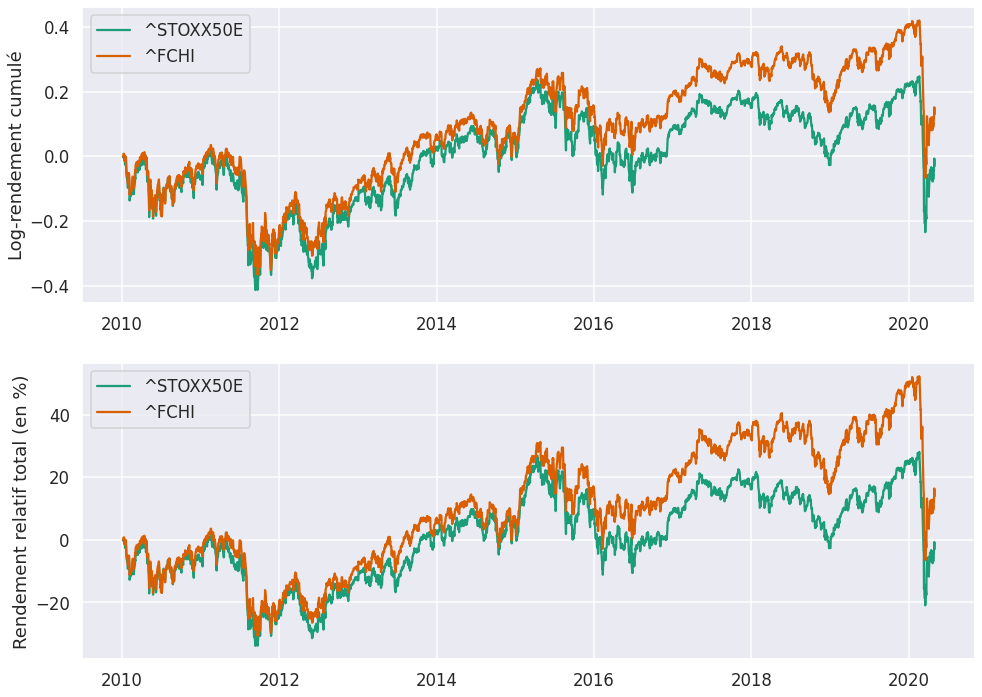

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for asset in log_returns:
    ax1.plot(log_returns.index, log_returns[asset].cumsum(), label=str(asset))

ax1.set_ylabel('Log-rendement cumulé')
ax1.legend(loc='best')

for asset in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[asset].cumsum()) - 1), label=str(asset))

ax2.set_ylabel('Rendement relatif total (en %)')
ax2.legend(loc='best')

plt.show()

***ARMA Model***

In [0]:
# Définir les tickers des instruments qu'il faut récupérer. Ici, Nous utiliserons les tickers d'Apple, de Microsoft et de l'indice S&P500. 
tickers = ['^STOXX50E', '^FCHI']

# Ici, nous renseignons la tranche de date que nous allons récupérer (du 01/01/2010 au 30/04/2020)
start_date = '2010-12-32' #'2010-12-31'
end_date = '2019-12-31' #'2017-12-31' 

# On utilise la fonction pandas_reader.data.DataReader pour charger les données souhaitées. 
panel_data = pdr.get_data_yahoo(tickers, start_date, end_date)


ParserError: ignored

In [0]:
# log returns
lrets = np.log(data/data.shift(1)).fillna(0)

In [0]:
lrets.head()

Symbols,^STOXX50E,^FCHI
2010-01-04,0.000000,0.000000
2010-01-05,-0.001804,-0.000264
2010-01-06,-0.000897,0.001185
2010-01-07,-0.000771,0.001773
2010-01-08,0.003489,0.005041


In [0]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline



In [0]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return



# Modele Autoregressive à l'ordre p $AR(p)$ sur données aléatoires

Le modele autoregressif est l''extension de la marche aléatoire. C'est une regression linéaire qui dépend des termes précédents: 
$$x_t = \alpha_1x_{t-1}+…+\alpha_px_{t-p}+w_t = \sum_{i=1}^{p} t_i\alpha_ix_{t-i}+w_t$$

C'est le modele Autoregressive à l'ordre "p",où $p$ represente le nombre de termes précédents utilisés (lag) à l'intérieur du modele, $\alpha_i$ est le coefficient, and $w_t$ correspond au bruit blanc. Notons que le modèle AR(1) avec $\alpha_1$=1 correspond à une marche aléatoire.

L'un des aspects les plus importants du modèle AR(p) est qu'il n'est pas toujours stationnaire. La stationnarité d'un modèle particulier dépend des paramètres. Par exemple, un modèle AR(1) avec $\alpha_1$ = 1 est une marche aléatoire et n'est donc pas stationnaire.

Simulons un modèle AR(1) avec $\alpha$ égal à 0,6

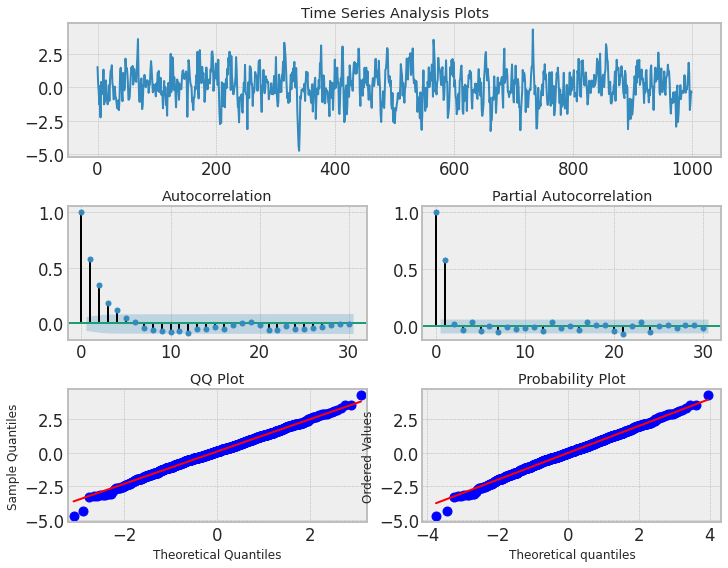

In [0]:
# Simulation d'un AR(1) avec a = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
_ = tsplot(x, lags=30)

Notez que la distribution de notre modèle AR(1) simulé est normale mais qu'il existe une corrélation en série significative entre les valeurs décalées visibles dans les graphiques ACF et PACF.

Les tracés PACF sont utilisés pour identifier l'étendue du retard dans un mode autorégressif. Si nous ne trouvons aucune corrélation significative dans un graphique PACF après un décalage de $k$, un modèle AR(k) est généralement un bon ajustement. En examinant ce graphique, nous pouvons émettre l'hypothèse qu'un modèle AR(1) devrait s'ajuster.

# Ajustement des données

Nous pouvons maintenant ajuster un modèle AR(p) en utilisant les statsmodels de Python pour estimer le coefficient alpha et l'ordre. Si le modèle AR est correct, le coefficient alpha estimé sera proche de notre alpha réel de 0,6 et l'ordre sélectionné sera égal à 1


In [0]:
# Fit an AR(p) model to simulated AR(1) model with alpha = 0.6

mdl = sm.tsa.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = sm.tsa.AR(x).select_order( maxlag=30, ic='aic', trend='nc')

true_order = 1
print('\nalpha estimate: %3.5f | order_estimate %s'%(mdl.params, est_order))
print('\ntrue alpha = %s | true order = %s'%(a, true_order))


alpha estimate: 0.58227 | order_estimate 1

true alpha = 0.6 | true order = 1


Looks like we were able to recover the underlying parameters of our simulated data.

Let's simulate an AR(2) process with $\alpha_1$ = 0.666 and $\alpha_2$ = -0.333.


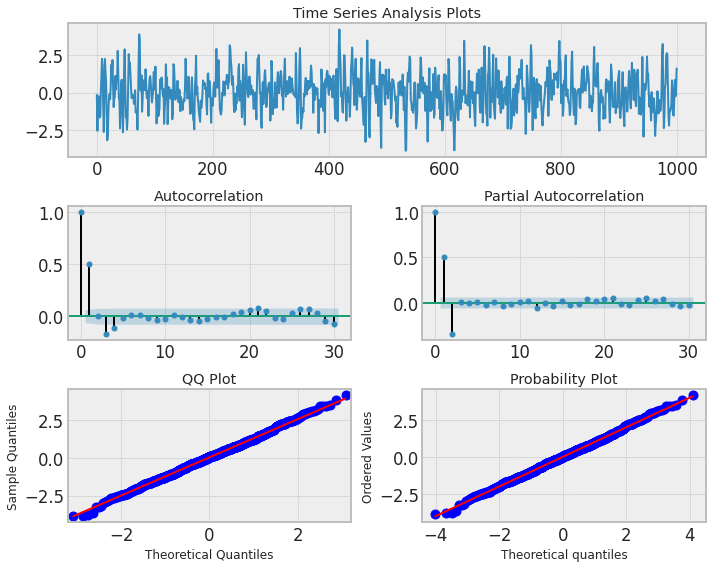

In [0]:
# Simulate an AR(2) process

n = int(1000)
alphas = np.array([.666, -.333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=30)

There is significant serial correlation between lagged values at lag 1 and 2 now, as evidenced by the PACF plot.Let's see if we recover the underlying parameters of our simulated data.


In [0]:
# Fit an AR(p) model to simulated AR(2) process

max_lag = 10
mdl = smt.AR(ar2).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(ar2).select_order( maxlag=max_lag, ic='aic', trend='nc')

true_order = 2
print('\ncoef estimate: %3.4f %3.4f | order estimate %s'%(mdl.params[0],mdl.params[1],est_order))


coef estimate: 0.6760 -0.3393 | order estimate 2


In [0]:
mdl = smt.AR(ar2).fit()
print ('Parameters')
print (mdl.params)
print ('Standard Error')
print (mdl.bse)

Parameters
[ 3.57345632e-02  6.67118523e-01 -3.40041205e-01  9.01909128e-03
 -1.11520048e-02  2.14435279e-02 -4.83381895e-02  3.28287551e-02
 -2.38531001e-02 -4.90031065e-04 -3.12735473e-02  5.21112625e-02
 -5.85303137e-02  2.17108859e-02 -5.58739239e-02  2.79663351e-02
 -6.45697812e-03 -2.90269682e-02  3.79624698e-02  1.12370300e-02
  2.54545125e-03  5.79634021e-02]
Standard Error
[0.03330767 0.03229192 0.03882052 0.04032568 0.04032737 0.04031148
 0.04030305 0.04029053 0.04027444 0.04025271 0.04022384 0.04018031
 0.0402171  0.04026555 0.04027908 0.04028844 0.04027529 0.04028007
 0.04028697 0.04034915 0.03870137 0.03212717]



# ***Autoregressive Moving Average Models - ARMA(p, q)***

Le modèle ARMA est simplement la combinaison des modèles AR(p) et MA(q) :

- Les modèles AR(p) tentent de saisir (expliquer) les effets de momentum et de retour à la moyenne souvent observés sur les marchés financiers.
- Les modèles MA(q) tentent de capturer (expliquer) les effets de choc observés dans les termes de bruit blanc. Ces effets de choc peuvent être considérés comme des événements inattendus affectant le processus d'observation, par exemple des gains surprises.

Par conséquent, un modèle ARMA tente de saisir ces deux aspects lors de la modélisation des séries chronologiques financières. Il convient de noter qu'un modèle ARMA ne prend pas en compte la volatilité.

$$x_t=\alpha_1x_{t-1}+...+\alpha_px_{t-p}+w_t+\beta_1w_{t-1}+...+\beta_qw_{t-q}$$

Où $w_t$ est un bruit blanc avec $E(w_t)=0$ et variance $\sigma^2$.

Un modèle ARMA nécessite souvent moins de paramètres qu'un modèle AR(p) ou MA(q) seul. C'est-à-dire qu'il est redondant dans ses paramètres



Estimation de $p$ et de $q$ ?

Pour ajuster les données à un modèle ARMA, nous utilisons le critère d'information d'Akaike (AIC) sur un sous-ensemble de valeurs pour p,q afin de trouver le modèle avec un AIC minimum, puis nous appliquons le test de Ljung-Box pour déterminer si un bon ajustement a été réalisé, pour des valeurs particulières de p,q. Si la valeur p du test est supérieure à la signification requise, nous pouvons conclure que les résidus sont indépendants et constituent un bruit blanc.

aic: -15732.21652 | order: (3, 2)


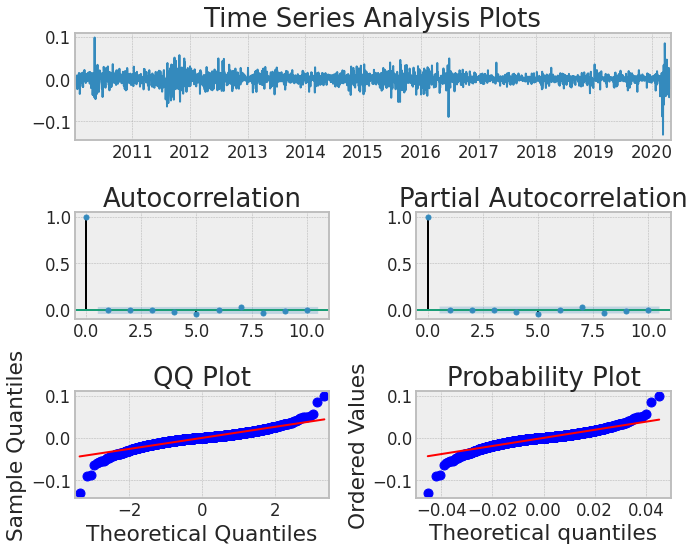

In [0]:
from numpy.linalg import LinAlgError
# Fit ARMA model to ^STOXX50E returns

TS = lrets['^STOXX50E'].dropna()
TS.index = pd.DatetimeIndex(TS.index.values,
                               freq=TS.index.inferred_freq)

best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(1,5) # [0,1,2,3,4,5]
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(TS, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except (ValueError, LinAlgError) as e: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

_ = tsplot(best_mdl.resid, lags=max_lag)

In [0]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

(array([29.2417979]), array([0.08310632]))

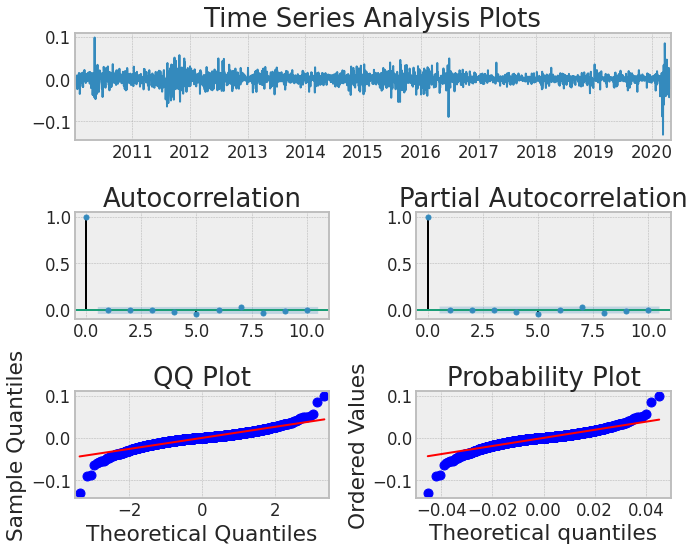

In [0]:
_ = tsplot(best_mdl.resid, lags=max_lag)

In [0]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

The residuals seem normally distributed.


aic: -15801.13051 | order: (1, 1)


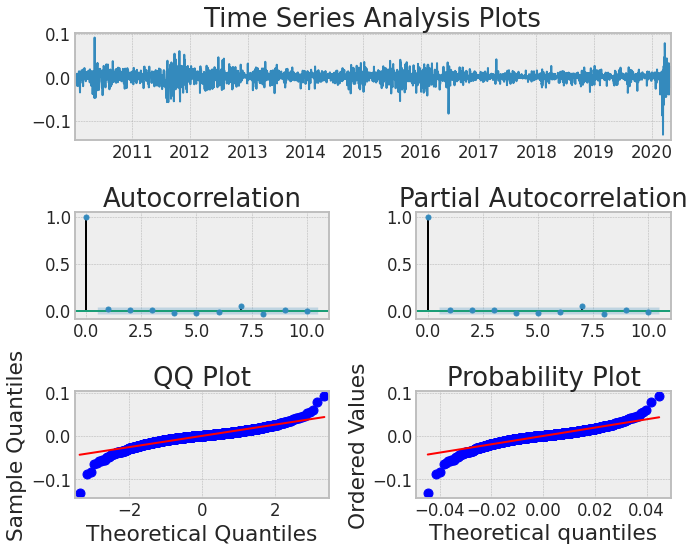

In [0]:
from numpy.linalg import LinAlgError
# Fit ARMA model to CAC40 returns

TS = lrets['^FCHI'].dropna()
TS.index = pd.DatetimeIndex(TS.index.values,
                               freq=TS.index.inferred_freq)

best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(1,5) # [0,1,2,3,4,5]
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(TS, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except (ValueError, LinAlgError) as e: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

_ = tsplot(best_mdl.resid, lags=max_lag)

In [0]:
# Retourne le log_rendement du dernier jour pour chaque actif (en colonne vecteur)
r_t = log_returns.tail(1).transpose()
r_t

In [0]:
# Définition des poids => répartition égale par 3 (poids répartis équitablement)
weight_asset= 1/3
weights_vector = pd.DataFrame(weight_asset, index=r_t.index, columns=r_t.columns)
weights_vector

In [0]:
# Total log_return du portfolio est:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return